# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

We start by importing the below packages:

In [1]:
import numpy as np
import itertools as it
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Local modules
import inauguralproject as my


# Question 1

We have constructed a function, which solve equation (1). The function is called `find_solution()` and is written in the module `inauguralproject.py`, which is imported as `my` in this notebook. Addtionally, we have calculated the labour supply, consumption, and utility in optimum. 

In [53]:
# a. Set parameter values:
m = 1          # Cash-on-hand
nu = 10        # Labour disutility scalar
epsilon = 0.3  # Frisch elasticity of labour supply
tau0 = 0.4     # Standard labour tax rate
tau1 = 0.1     # Extra tax when paying top tax
kappa = 0.4    # Income cut-off for paying top tax
w = 0.5        # Wage
x_resource = 2 # Total resources

In [54]:
# b. We define the utility function  given the parameters above
def utility(l, c, epsilon, nu):
    return np.log(c) - nu*(l**(1 + 1/epsilon)/(1 + 1/epsilon))

# c. Likewise the budget constraint
def budget_constraint(l, m, w, kappa, tau0, tau1):
    return m + w*l - (tau0*w*l + tau1*max((w*l - kappa), 0))

# d. We use find_solution from our module inauguralproject.py (imported as my)
l_star, c_star, utility_star = my.find_solution(budget_constraint, utility, m, w, epsilon, kappa, nu, tau0, tau1)

In [55]:
# e. Print the results 
print(f'The optimal labour supply is: {l_star:.2f}')
print(f'The optimal consumption is: {c_star:.2f}')
print(f'The utility resulting from this is: {utility_star:.2f}')

The optimal labour supply is: 0.34
The optimal consumption is: 1.10
The utility resulting from this is: 0.08


# Question 2

We plot the optimal labour supply and consumption for different values of the wage rate. 

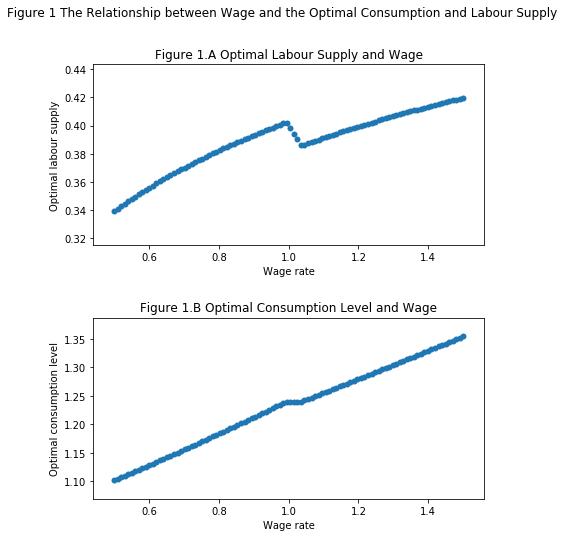

In [5]:
# a. We generate values of optimal labour supply and consumption at different wage level to use in figure
# i. We define vectors to use in the loop
N_fig = 100
w_vec = np.linspace(0.5, 1.5, N_fig)
l_star_vec = np.empty(N_fig)
c_star_vec = np.empty(N_fig)

# ii. Optimize utility with different wages in interval [0.5, 1.5], i.e. w_vec
for i, wi in enumerate(w_vec):
    
    # o. Call function from previous exercise
    fs = my.find_solution(budget_constraint, utility, m, wi, epsilon, kappa, nu, tau0, tau1)
    
    # oo. Replace the optimal labour supply and consumption levels in vectors
    l_star_vec[i] = fs[0]
    c_star_vec[i] = fs[1]
    
    
# b. Plot optimal labour supply and optimal consumption level as a function of the wage

# i. Make a figure with two subplots
fig, axes = plt.subplots(2, figsize=(7,8))

# ii. We add title and adjust the width and height
plt.suptitle("Figure 1 The Relationship between Wage and the Optimal Consumption and Labour Supply")
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# iii. First subplot: Optimal labour supply and the wage rate
sns.scatterplot(
    x=w_vec, y=l_star_vec,
    palette=sns.color_palette("hls", 10),
    linewidth=0,
    legend=None, 
    ax = axes[0]
)

axes[0].set_ylabel("Optimal labour supply")
axes[0].set_xlabel("Wage rate")
axes[0].set_title("Figure 1.A Optimal Labour Supply and Wage")

# iv. Second subplot: Optimal consumption and the wage rate
sns.scatterplot(
    x=w_vec, y=c_star_vec,
    palette=sns.color_palette("hls", 10),
    linewidth=0,
    legend=None, 
    ax = axes[1]
)

axes[1].set_ylabel("Optimal consumption level")
axes[1].set_xlabel("Wage rate")
axes[1].set_title("Figure 1.B Optimal Consumption Level and Wage")

plt.show()

# Question 3

The total tax revenue is 1630.4, when the Frisch elasticity of labour supply is $\epsilon=0.3$, as seen from the output of the code below. 

In [41]:
# a. Set inputs to total_tax()
N = 10000
low = 0.5
high = 1.5
seed = 1234

# b. Calculate the total tax revenue using total_tax() from our module inauguralproject.py (imported as my)
T = my.total_tax(N, low, high, seed, budget_constraint, utility, m, epsilon, kappa, nu, tau0, tau1)

# c. Print the result
print(f'The total tax revenue is: {T:.2f}')

The total tax revenue is: 1630.37


# Question 4

The total tax revenue with $\varepsilon=0.1$ is 3197.3, as seen from the output of the code below. Hence, the tax revenue is higher when the Frisch elasticity of labour supply is lower. 

In [9]:
# a. Change value of epsilon
epsilon = 0.1

# b. Calculate and print tax revenue using total_tax() from our module inauguralproject.py (imported as my)
T2 = my.total_tax(N, low, high, seed, budget_constraint, utility, m, epsilon, kappa, nu, tau0, tau1)

# c. Print the result
print(f'The total tax revenue is: {T2:.2f}')

The total tax revenue is: 3197.33


# Question 5

The below code will require you to have the .py file

In [48]:
# a. Set value of epsilon back to 0.3
epsilon = 0.3

# b. Define objective function as negative total_tax(), since we're minimizing
obj2 = lambda x: -my.total_tax(N, low, high, seed, budget_constraint, utility, m, epsilon, x[0], nu, x[1], x[2])

# c. Set initial guess and bounds for parameters
initial_guess = [0.4, 0.4, 0.1]
bounds = ((0,3), (0,1), (0,1))

# d. Optimize using scipy optimize
res = optimize.minimize(fun=obj2, x0=initial_guess, bounds=bounds, method='L-BFGS-B', options={'disp':True})
res

      fun: -2467.393489308209
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -5.58065949e-01,  8.75212072e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 76
      nit: 4
   status: 0
  success: True
        x: array([0.08204793, 0.78545109, 0.        ])

In [52]:
# e. Print result
print(f'The optimal cut-off for the top labour income bracket is: {res.x[0]:.3f}')
print(f'The optimal standard labour income tax is: {res.x[1]:.3f}')
print(f'The optimal top bracket labour income tax is: {res.x[2]:.2f}')

T_opt = my.total_tax(N, low, high, seed, budget_constraint, utility, m, epsilon, res.x[0], nu, res.x[1], res.x[2])
print(f'The total tax revenue is then: {T_opt:.2f}')

The optimal cut-off for the top labour income bracket is: 0.082
The optimal standard labour income tax is: 0.785
The optimal top bracket labour income tax is: 0.00
The total tax revenue is then: 2467.39


# Conclusion

In this project, we have looked at labour supply and taxation. In question 1, we found that at the given parametrisation of the model, the optimal labour supply is 0.34, the optimal consumption level is 1.10, and the utility resulting from these is 0.08. In question 2, we found that both the optimal consumption level and the optimal labour supply is increasing in the wage rate. In question 3 and 4, we found that the total tax revenue was decreasing in the Frisch elasticity of labour, $\epsilon$. Specifically, we found a total tax revenue of 1630 when $\epsilon=0.3$, and a total tax revenue of 3197 when $\epsilon=0.1$. Finally in question 5, we found that a politician who wishes to maximise the total tax revenue should set the a very high standard labour income and no top bracket income tax (when $\epsilon=0.3$). The specific values can be seen just above. Setting the tax like this, the politician avoids that workers bunch their labour supply around the cut-off for the labour income bracket. 